# 실습 Zero
- 기계학습 구현에 자주 쓰는 기초 문법들

## 1. 파이토치 기초

In [1]:
import torch

In [16]:
def print_val(val):
    print("Type: {}\nShape: {}\n값: {}".format(type(val), val.shape, val))

In [17]:
x = torch.rand(2, 3, 2)  # uniform: 0~1사이 모든 값들이 나올 확률이 같음
print_val(x)

x = torch.rand(2, 3)  # Gaussian: 0을 평균으로 하는 가우시안 분포를 따르는 랜덤값
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3, 2])
값: tensor([[[0.0595, 0.2945],
         [0.5289, 0.5231],
         [0.5969, 0.8086]],

        [[0.5711, 0.4425],
         [0.5108, 0.4300],
         [0.4696, 0.9864]]])
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값: tensor([[0.5790, 0.2095, 0.5560],
        [0.3317, 0.0635, 0.1532]])


In [18]:
x = torch.randperm(4)  # 0 ~ n-1까지 값을 원소로 갖는 배열 -> 랜덤 배열
print(x)

tensor([0, 1, 3, 2])


In [19]:
# [start, end) 구간을 step 단위로 나눠서 배열로 생성
x = torch.arange(0, 3, step=0.5)
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([6])
값: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])


In [21]:
print_val(torch.ones(3,4))
print_val(torch.zeros(3,4))

Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 4])
값: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 4])
값: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [22]:
print_val(torch.Tensor(2,4))

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 4])
값: tensor([[1.3730e+33, 3.0639e-41, 3.7835e-44, 0.0000e+00],
        [       nan, 0.0000e+00, 1.3733e-14, 6.4069e+02]])


In [24]:
print_val(torch.Tensor([2,3]))
print_val(torch.Tensor([[2,3], [3,4]]))

Type: <class 'torch.Tensor'>
Shape: torch.Size([2])
값: tensor([2., 3.])
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 2])
값: tensor([[2., 3.],
        [3., 4.]])


In [25]:
# 텐서 타입 변환
x = torch.FloatTensor(2,3)
print_val(x)

x = x.type_as(torch.IntTensor())
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값: tensor([[1.3005e+33, 3.0639e-41, 4.4842e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값: tensor([[-2147483648,           0,           0],
        [          0, -2147483648,           0]], dtype=torch.int32)


In [26]:
# 텐서 크기 반환
torch.FloatTensor(3,4,5).size()

torch.Size([3, 4, 5])

In [27]:
# numpy array -> torch tensor
import numpy as np
np_x = np.ndarray((2,3), dtype=int)
print_val(np_x)

x = torch.from_numpy(np_x)
print_val(x)

Type: <class 'numpy.ndarray'>
Shape: (2, 3)
값: [[93911448492560              0              0]
 [             0              0              0]]
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값: tensor([[93911448492560,              0,              0],
        [             0,              0,              0]])


## 2. MNIST 데이터 로드
• Modified National Institute of Standards and Technology database  
• 손으로 쓴 숫자 데이터 셋  
• 0~9 카테고리 있음  
• 학습 데이터 60,000, 테스트 데이터 10,000  
• Yann LeCun의 웹사이트  

In [28]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

### 0) MNIST 확인


In [32]:
# 1. MNIST 로드
mnist_train = dset.MNIST("", train = True, transform = transforms.ToTensor(), 
                         target_transform = None, download = True)


torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이: 60000
5
torch.Size([1, 28, 28])


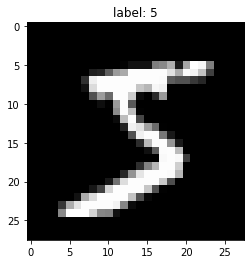

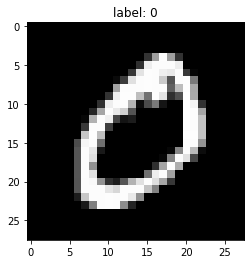

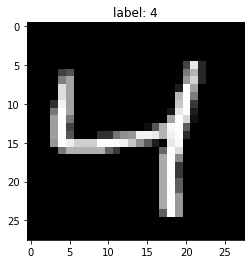

In [35]:
# 2. 그려보기
# MNIST data 하나 형태 출력
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

image, label = mnist_train[1]
print(image.size(), label)

print(mnist_train.__len__())
print("mnist_train 길이:", len(mnist_train))

# 그리기
print(mnist_train[0][1])  # label
print(mnist_train[0][0].size())  # image

for i in range(3):
    img = mnist_train[i][0].numpy()  # image 타입을 numpy로 변환 (1, 28, 28)
    # print "label:", mnist_train[i][1]
    plt.title("label: %d"%mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

### 1) MNIST train, test dataset 가져오기

In [40]:
# "": 현재 폴더에 MNIST 있음
mnist_train = dset.MNIST("", train = True, transform = transforms.ToTensor(), 
                         target_transform = None, download = True)
mnist_test = dset.MNIST("", train = False, transform = transforms.ToTensor(), 
                        target_transform = None, download = True)

### 2) 대략적인 데이터 형태


mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태: torch.Size([1, 28, 28])
label:  5


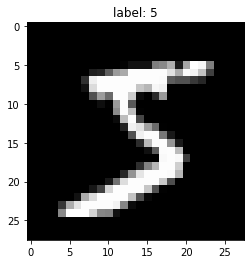

In [41]:
print("mnist_train 길이: ", len(mnist_train))
print("mnist_test 길이: ", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0)  # 0번째 데이터
print("image data 형태:", image.size())
print("label: ", label)

# 그리기
img = image.numpy()  # image 타입을 numpy로 변환 (1, 28, 28)
plt.title("label: %d"%label)
plt.imshow(img[0], cmap='gray')
plt.show()

### 3) 데이터 로드함수
학습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [42]:
batch_size = 16

train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size = batch_size, shuffle = True,
                                           num_workers = 2, drop_last = True)  # batch_size만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size = batch_size, shuffle = False, 
                                          num_workers = 2, drop_last = True)

### 4) 데이터 로드함수 이해하기


In [ ]:
n = 3  # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader):  # batch_size만큼
    if i>5:
        break
    
    print("[%d]"%i)
    print("한 번에 로드되는 데이터 크기", len(imgs))

    # GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 자동으로 CPU로 로드됨
    x = Variable(imgs)  # .cuda()   # (batch_size, 1, 28, 28)
    x = x.reshape((x.shape[0], x.shape[2], x.shape[3]))  # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
    y_ = Variable(labels)  # .cuda()  # batch_size

    print(x.shape)
    print(y_.shape)

    # 그리기
    for j in range(n):
        img = img[j].numpy()  # image 타입을 numpy로 변환 (1, 28, 28)
        img = img.reshape((img.shape[1], img.shape[2]))  # (1, 28, 28) -> (28, 28)
        # print img.shape

        plt.subplot(1, n, j+1)
        plt.imshow(img, cmap='gray')
        plt.title("label: %d"%labels[j])
    plt.show()